# Bill or Neil?

#### When my girls were little, I watched Bill Nye The Science Guy with them a lot. Bill Nye is one of my most admired modern scientists. 
#### Another scientist that I admire the most is Neil Degrasse Tyson. I can bing watch  Neil's cosmic series on Netflix all day long.

#### I wonder what these two great scientists often tweet about. 

#### In this project, I scrap their tweets and try to find out what these two great scientists talk about, how many people like what they say, and how many times their tweets being retweeted.  

#### I also want to use machine learning on user prediction. 


In [1]:
# First, import libraries

import twitter, re, datetime, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Set up twitter credential 


# your keys go here:

twitter_keys = {
    'consumer_key':        'YOUR CONSUMER KEY',
    'consumer_secret':     'YOUR CONSUMER SECRET KEY',
    'access_token_key':    'YOUR ACCESS TOKEN',
    'access_token_secret': 'YOUR ACCESS TOKEN SECRET'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)


In [3]:
# Setup a TweetMiner object

class TweetMiner(object):

    result_limit    =   100    
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 100):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="user", mine_rewteets=False, max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    #'tweet_id':        item.id,
                    #'location':        item.location,
                    #'place':           item.place,
                    'handle':          item.user.name,
                    'favorite_count':  item.favorite_count,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'hashtags':        item.hashtags,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [4]:
# create a miner object

miner = TweetMiner(keys_dict = twitter_keys, api = api, result_limit = 500)

In [5]:
# check sample results

bill = miner.mine_user_tweets(user = 'BillNye')
neil = miner.mine_user_tweets(user = 'neiltyson')

neil[:2]

[{'created_at': u'Mon Oct 30 14:45:02 +0000 2017',
  'favorite_count': 141581,
  'handle': u'Neil deGrasse Tyson',
  'hashtags': [],
  'mined_at': datetime.datetime(2017, 11, 1, 22, 5, 42, 400312),
  'retweet_count': 35414,
  'text': u'If the world were really going to end, cosmically, I\u2019d let y\u2019all know, and with plenty of time to do nothing about it.'},
 {'created_at': u'Sat Oct 28 15:09:17 +0000 2017',
  'favorite_count': 2276,
  'handle': u'Neil deGrasse Tyson',
  'hashtags': [],
  'mined_at': datetime.datetime(2017, 11, 1, 22, 5, 42, 400325),
  'retweet_count': 399,
  'text': u'JUST POSTED: @StarTalkRadio\u2019s \u201cThe Power of Political Satire" with @billmaher. On @ApplePodcasts &amp;\u2026 https://t.co/vN9Q1591hL'}]

## Tweets Exploration

In [6]:
# Put the results into dataframe & check 10 samples

bill_df = pd.DataFrame(bill)
neil_df = pd.DataFrame(neil)
bill_df.head(10)

# Love that pumkin emoji :-)

,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text
0,Wed Nov 01 18:09:04 +0000 2017,430,Bill Nye,[],2017-11-01 22:05:40.391186,53,Soothe your post-Halloween sugar hangover with...
1,Wed Nov 01 03:15:03 +0000 2017,8825,Bill Nye,[],2017-11-01 22:05:40.391198,713,Happy Halloween from Nye Labs 🎃 https://t.co/...
2,Fri Oct 27 17:01:24 +0000 2017,0,Bill Nye,[],2017-11-01 22:05:40.391201,41,"RT @billnyefilm: Get ghouled up, snap a selfie..."
3,Thu Oct 26 20:18:36 +0000 2017,0,Bill Nye,"[{""text"": ""NYC""}]",2017-11-01 22:05:40.391204,42,RT @billnyefilm: #NYC peeps! @BillNye IN-PERSO...
4,Wed Oct 25 20:03:42 +0000 2017,524,Bill Nye,"[{""text"": ""NYC""}]",2017-11-01 22:05:40.391207,86,#NYC: Join me + the filmmakers for Q&amp;A scr...
5,Wed Oct 25 02:04:20 +0000 2017,0,Bill Nye,"[{""text"": ""TheOpposition""}]",2017-11-01 22:05:40.391210,99,"RT @TheOpposition: Tonight on #TheOpposition, ..."
6,Tue Oct 24 22:32:01 +0000 2017,28678,Bill Nye,"[{""text"": ""worldpolioday""}]",2017-11-01 22:05:40.391213,9728,It’s #worldpolioday. Vaccines work. It’s science.
7,Fri Oct 20 20:03:24 +0000 2017,0,Bill Nye,"[{""text"": ""NewYork""}]",2017-11-01 22:05:40.391215,78,"RT @billnyefilm: Get ready, #NewYork.\n@BillNy..."
8,Thu Oct 19 22:41:19 +0000 2017,1127,Bill Nye,[],2017-11-01 22:05:40.391218,123,It’s your final chance to join me for the laun...
9,Fri Oct 13 00:48:09 +0000 2017,905,Bill Nye,[],2017-11-01 22:05:40.391222,173,The countdown is on and it’s your LAST CHANCE ...


In [7]:
# Check how many tweets were scrapped from both scientists
print(bill_df.shape)
print (neil_df.shape)

# Each have 1000 tweets.

(1000, 7)
(1000, 7)


In [8]:
print 'The most recent tweet from Bill Nye is created at: ', bill_df['created_at'][0]
print 'The oldest tweet from the Bill Nye tweet dataset is: ', bill_df['created_at'][999]

# Bill Nye's dataset contains about 3-year worth of tweets. 

The most recent tweet from Bill Nye is created at:  Wed Nov 01 18:09:04 +0000 2017
The oldest tweet from the Bill Nye tweet dataset is:  Wed Sep 17 02:35:12 +0000 2014


In [9]:
bill_df.describe()

# Wow, there is a 115271 likes on a tweet. The most retweet is 91724. 

,favorite_count,retweet_count
count,1000.000000,1000.00000
mean,2271.315000,1073.01400
std,7039.143533,4621.52869
min,0.000000,0.00000
25%,14.250000,107.75000
50%,648.500000,252.50000
75%,1963.250000,654.00000
max,115271.000000,91714.00000


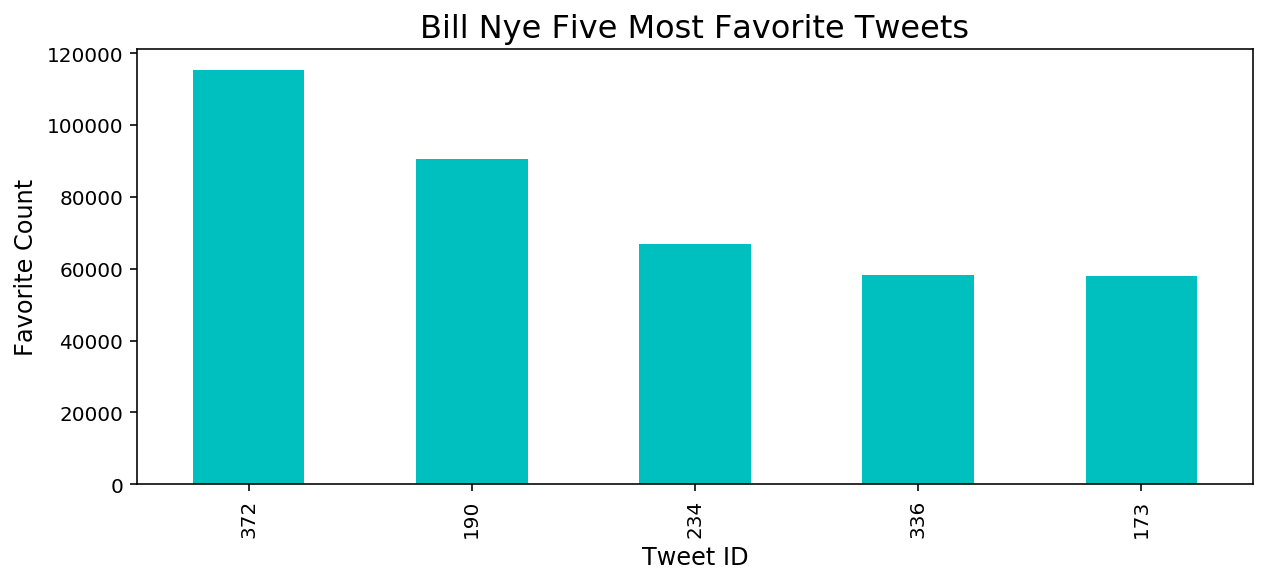

In [10]:
# Look at Bill 5 most liked tweet

bill_df['favorite_count'].sort_values(ascending = False)[:5].plot(kind = 'bar',
                                                                   figsize = (10, 4),
                                                                  color = 'c')
plt.title('Bill Nye Five Most Favorite Tweets', fontsize = 16)
plt.xlabel('Tweet ID', fontsize = 12)
plt.ylabel('Favorite Count', fontsize = 12)
plt.show()


In [11]:
# Bill tweets receive a lot of likes, especially the tweet line item 370, 188, 232, 334, and 171. 
# Let's see what these tweets were talking about. 

print (bill_df.iloc[372,6])
print (bill_df.iloc[190,6])
print (bill_df.iloc[234,6])
print (bill_df.iloc[336,6])
print (bill_df.iloc[173,6])


"They" don't want you to be concerned about climate change, but @djkhaled &amp; I want you to be. Major 🔑/ Major 🔬 https://t.co/gKtI2TZLnC
Ordering the EPA or NASA not to talk about climate change isn’t going to cool things off. Don't double down on deni… https://t.co/p8J7MRxjwc
Happy Thanksgiving to all! https://t.co/FA12naYawU
Don't ever let them tell you science isn't cool. @neiltyson https://t.co/OjDI51e8HM
The joy of discovery is ever so sweet. https://t.co/2aT2TbTkZr


The most favorite tweets from Bill Nye are related climate change, encourge science and discovery. 

Yes science is COOL!!!! 

He is my guy! 

Let's check Neil.

In [12]:
print 'The most recent tweet from Neil Tyson is created at: ', neil_df['created_at'][0]
print 'The oldest tweet of the Neil Tyson tweet dataset is: ', neil_df['created_at'][999]

The most recent tweet from Neil Tyson is created at:  Mon Oct 30 14:45:02 +0000 2017
The oldest tweet of the Neil Tyson tweet dataset is:  Tue Oct 06 00:08:03 +0000 2015


**Neil's twitter dataset is about 2 years worth of tweets. He seems to tweet more than Bill.**

** Let's check which tweets from Neil get the most likes.**

In [13]:
neil_df.describe()

,favorite_count,retweet_count
count,1000.00000,1000.000000
mean,14467.40200,5381.743000
std,30512.28883,12657.338197
min,0.00000,0.000000
25%,611.50000,98.250000
50%,4443.50000,1046.000000
75%,14834.75000,4891.750000
max,357826.00000,143436.000000


Oh wow!!!! 357836 likes with 143436 retweet. Let's check it out. 

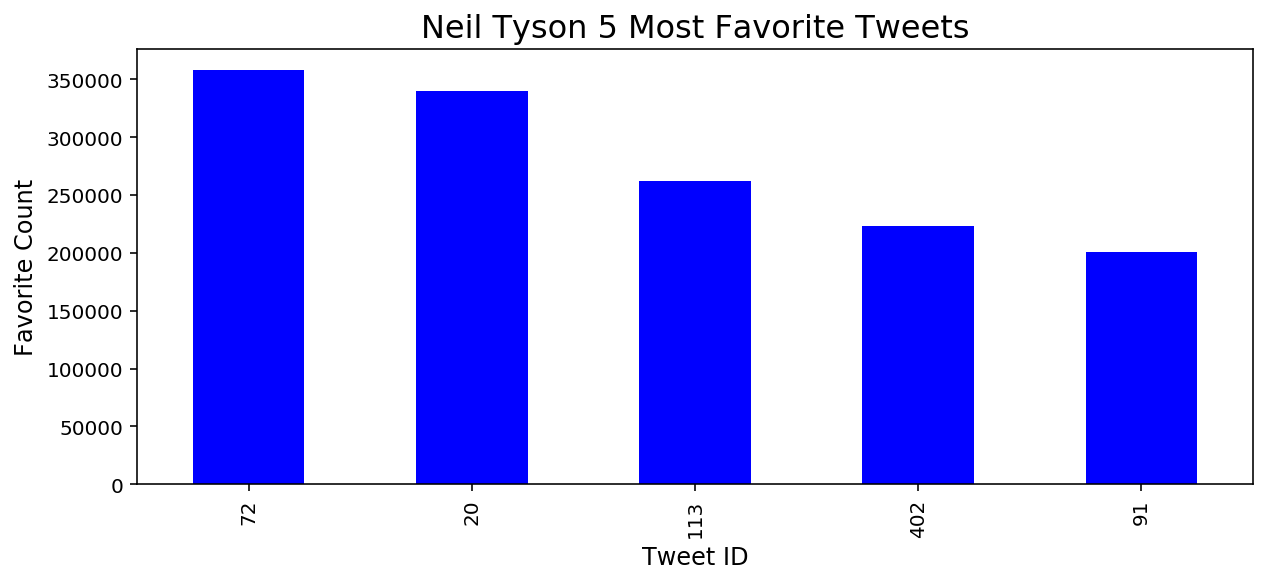

In [14]:
# Look at Bill most favorite tweet

neil_df['favorite_count'].sort_values(ascending = False)[:5].plot(kind = 'bar',
                                                                   figsize = (10, 4),
                                                                  color = 'b')
plt.title('Neil Tyson 5 Most Favorite Tweets', fontsize = 16)
plt.xlabel('Tweet ID', fontsize = 12)
plt.ylabel('Favorite Count', fontsize = 12)
plt.show()

In [15]:
# Let's see what these tweets were talking about from Neil. 

print (neil_df.iloc[72,6])
print (neil_df.iloc[20,6])
print (neil_df.iloc[113,6])
print (neil_df.iloc[402,6])
print (neil_df.iloc[91,6])

In school, students cheat because the system values high grades more than students value learning.
Let’s Make America Smart Again.
Odd. No one is in denial of America’s Aug 21 total solar eclipse. Like Climate Change, methods &amp; tools of science predict it.
I dream of a world where the truth is what shapes people's politics, rather than politics shaping what people think is true.
The divided United States of America will unite today, sharing a cosmic event predicted by the methods and tools of… https://t.co/nPUwQK87Rr


I totally agree education system emphasizes too much on grades instead of learning. Sad!

Overwhelmingly agreed by people, but still, there isn't an alternative or should I say, another popular system to measure level of student competency except throwing them into a test pit. 


## Word Frequency

One of the ways to analyze user tweeting style and what they commonly talk about is word frequency. 

Every user has their favorite words to use. Let's break down the two users' tweets and find out what words they like to use. 

In [16]:
# nltk has a word tokenizer that would break down the words. 

#import nltk library
import nltk
from nltk.tokenize import word_tokenize

# test how a tweet being tokenized using nltk tokenizer
test_tweet = bill_df['text'][7]
print ('Original_test_tweet --> ', test_tweet)

print ('-------')

tokenize_test_tweet = word_tokenize(test_tweet)
print('Tokenize_test_tweet -->  ', tokenize_test_tweet)

('Original_test_tweet --> ', u'RT @billnyefilm: Get ready, #NewYork.\n@BillNye in-person Q&amp;As at @sunshine_cinema 10/27 &amp; 10/28 \u2192 https://t.co/2jR9cqKyrU https://t.co/7Qlw\u2026')
-------
('Tokenize_test_tweet -->  ', [u'RT', u'@', u'billnyefilm', u':', u'Get', u'ready', u',', u'#', u'NewYork', u'.', u'@', u'BillNye', u'in-person', u'Q', u'&', u'amp', u';', u'As', u'at', u'@', u'sunshine_cinema', u'10/27', u'&', u'amp', u';', u'10/28', u'\u2192', u'https', u':', u'//t.co/2jR9cqKyrU', u'https', u':', u'//t.co/7Qlw\u2026'])


**The nltk word tokenizer breaks down words using standard English words.**


**But social media chats are different, especially tweets. Tweets have a lot of**
* hashtags begin with #, 
* mentions begin with @, 
* urls begin with http(s), and 
* emojis

** These should be treated as one string of word. For example, https://t.co/2jR9cqKyrU should be treated as an url. But nltk tokenizer breaks the url into three parts:**

    1) https
    2) :
    3) //t.co/7Qlw\u2026
    

Some words such as 'i', 'me', 'my' etc. are very common and used on all types of writings. But these words do not help on distinguishing user writing style, pattern analysis, and predictions.

These words are called stop words.

nltk has a ‘stopword’ library that can remove these stop words.

Punctuations also have are irrelevent when it comes to sentiment analysis except they come with the #hashtags, @mentions, and http(s)//:url. We need to eliminate these punctuations. String library has the list of punctuations. 


In [17]:
# Import the stopwords library from nltk and punctuations from string. 

from nltk.corpus import stopwords
import string

stopwords = stopwords.words('english')

punctuations = list(string.punctuation)

# Take a look at the stopwords and punctuations for eliminations
print(stopwords)

print(punctuations)

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [18]:
# there may be some additional non-meaningful words we want to remove as well. 
# Let's create a list called do_not_want_list.

do_not_want_list = ['rt', 'amp', 'q', '1', '2', '3', '4', '5', 
                    '6', '7', '8', '9', '10', '11', '12', '13','14', '15', '16',
                    '17', '18', '19', '20', '21', '22', '23', '24', '25', 
                    '26', '27', '28', '29', '30', '31',"i'am", "it's", "don't", 
                    'w', 'bill', '@billnye', "let's", 'https', 'us', 'fyi', 'would', 'one']
                

In [19]:
# Combine all the stop words, punctunation, and do_not_want_list for removal

stop = stopwords + punctuations + do_not_want_list

In [20]:
# Since we want the emojis, the hashtags with #, the mention with @, 
# and the web addresses with http/https: tokenized as whole string, 
# we need to tokenize them differently.
# I borrowed this code from Marco Bonazani and twist it a bit to accomodate my requirements. 
# Thank you Marco. 

# Keep the emojis
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

# Keep the special phases
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
    r'^\d*'
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def tweet_preprocess(s, lowercase=False):
    tokens = tokenize(s)
    tokens = [word for word in tokens if not word in stop]
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [21]:
# Compare how the tweet being tokenized now using customized tokenization.

print ('Original_test_tweet --> ', test_tweet)

print ('---------------------------------------')

tokenize_test_tweet = word_tokenize(test_tweet)
print('Standard_tokenize_test_tweet -->  ', tokenize_test_tweet)

print ('---------------------------------------')

print('Customize_tokenize_test_tweet --> ', tweet_preprocess(test_tweet))


('Original_test_tweet --> ', u'RT @billnyefilm: Get ready, #NewYork.\n@BillNye in-person Q&amp;As at @sunshine_cinema 10/27 &amp; 10/28 \u2192 https://t.co/2jR9cqKyrU https://t.co/7Qlw\u2026')
---------------------------------------
('Standard_tokenize_test_tweet -->  ', [u'RT', u'@', u'billnyefilm', u':', u'Get', u'ready', u',', u'#', u'NewYork', u'.', u'@', u'BillNye', u'in-person', u'Q', u'&', u'amp', u';', u'As', u'at', u'@', u'sunshine_cinema', u'10/27', u'&', u'amp', u';', u'10/28', u'\u2192', u'https', u':', u'//t.co/2jR9cqKyrU', u'https', u':', u'//t.co/7Qlw\u2026'])
---------------------------------------
('Customize_tokenize_test_tweet --> ', [u'RT', u'@billnyefilm', u'Get', u'ready', u'#NewYork', u'@BillNye', u'in-person', u'Q', u'As', u'@sunshine_cinema', u'https://t.co/2jR9cqKyrU', u'https://t.co/7Qlw'])


** The customized tokenization is not perfect. But the function keeps the hashtags, the mentions and the url intact. **

** Punctuations such as individual ':', '&', ';' also removed.**

** Stop words such as 'at' is removed. The word 'As' is not removed because we have not make it a lowercase yet. If you notice, all stop words are in lowercase. **

** There are some words such as 'RT', meaning retweet, 'amp', and the date break down will not have much meaningful on user and topic predictions. These will be added to the do_not_want_list for removal.**

** What we are going to do next is to create a corpus using the customized tokenizer. **



In [22]:
# Now we create corpus for each scientist 

bill_corpus = []

for word in bill_df['text']:
    word = word.lower() # put all the words in lowercase
    tweets = tweet_preprocess(word)
    bill_corpus.extend(tweets)
print(bill_corpus[:20])

[u'soothe', u'post-halloween', u'sugar', u'hangover', u'science', u'@billnyefilm', u'screens', u'nyc', u'@sunshine_cinema', u'thru', u'nov', u'https://t.co/9lwjhd2oxd', u'happy', u'halloween', u'nye', u'labs', u'https://t.co/qvdlqisigg', u'@billnyefilm', u'get', u'ghouled']


In [23]:
# Create a corpus for Neil

neil_corpus=[]

for word in neil_df['text']:
    word = word.lower() # put all the words in lowercase
    tweets = tweet_preprocess(word)
    neil_corpus.extend(tweets)
print(neil_corpus[:20])

[u'world', u'really', u'going', u'end', u'cosmically', u'let', u'know', u'plenty', u'time', u'nothing', u'posted', u'@startalkradio', u'power', u'political', u'satire', u'@billmaher', u'@applepodcasts', u'https://t.co/vn9q1591hl', u'know', u'mars']


### Bill Nye's 20 Most Common Words

In [24]:
# Create a counter to count the words

from collections import Counter
bill_counter = Counter()

In [25]:
# Loop through the Bill's corpus to count words

for word in bill_corpus:
    bill_counter[word] +=1
    
# Check the 20 most common words Bill uses   
print(bill_counter.most_common(20))

[(u'science', 115), (u'change', 90), (u'world', 77), (u'climate', 73), (u'@exploreplanets', 64), (u'day', 57), (u'get', 53), (u'today', 51), (u'tonight', 40), (u'new', 38), (u'space', 38), (u'big', 34), (u'time', 33), (u'#strictlyscience', 31), (u'join', 30), (u'@billnyefilm', 29), (u'happy', 29), (u'people', 28), (u'go', 28), (u'guy', 28)]


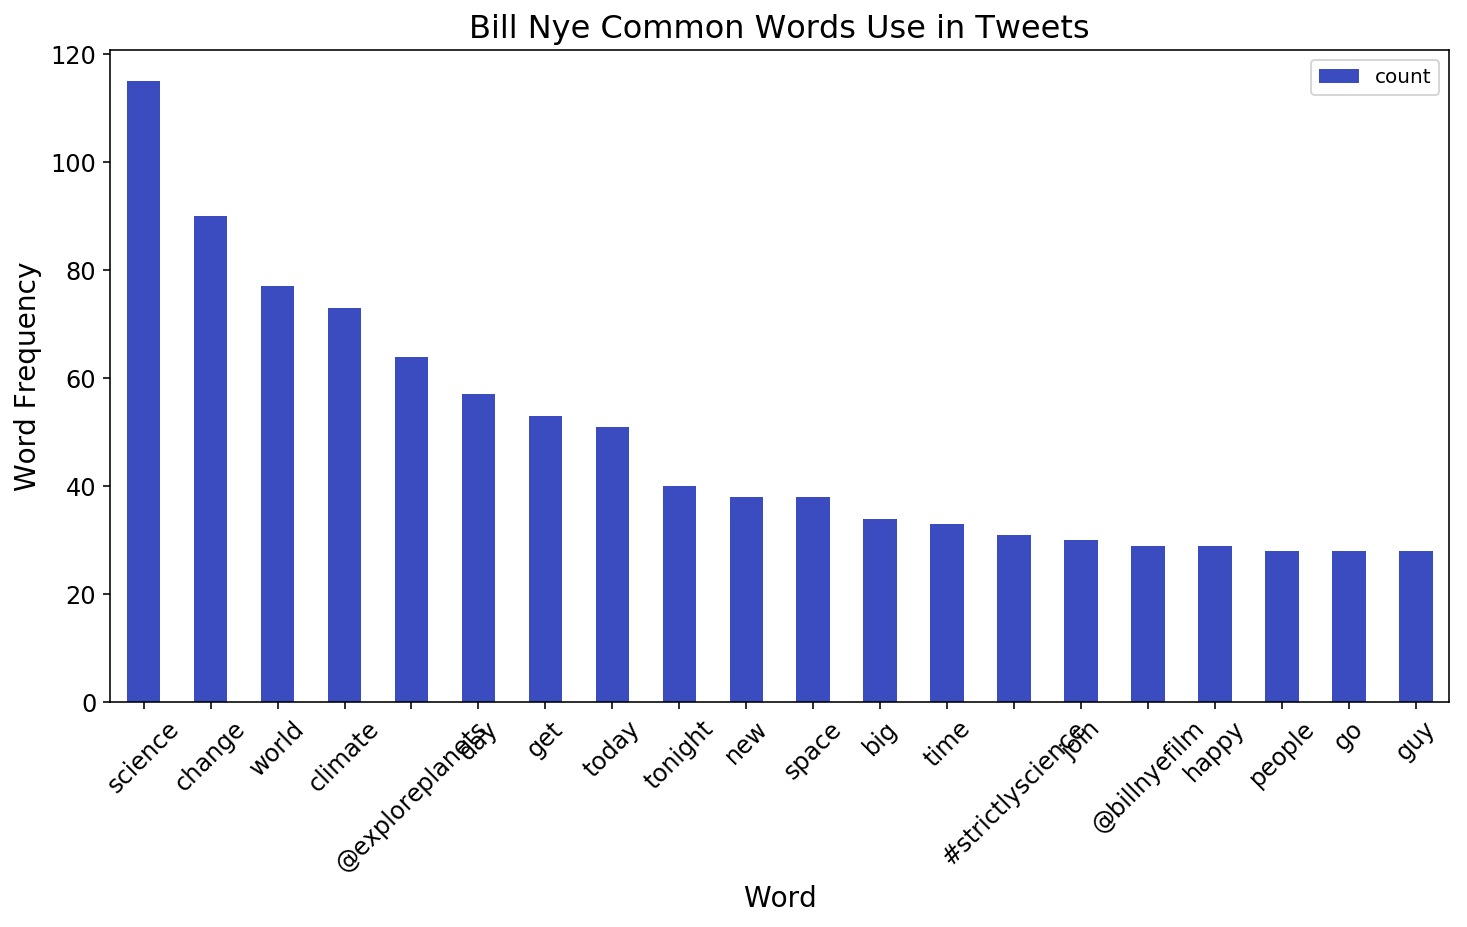

In [26]:
bill_common_words = pd.DataFrame(bill_counter.most_common(20), columns = ['word', 'count'])
bill_common_words.plot(x = 'word', y = 'count', kind = 'bar', figsize = (12, 6), fontsize=12,
                      colormap = 'coolwarm', rot = 45)

plt.title('Bill Nye Common Words Use in Tweets', fontsize = 16)
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 14)
plt.show()


** OK, we have Bill's most common word tally. **

** Bill likes to talk about science (yes of course, he is a scientist). He uses the words change, world, and climate a lot. **

** Bill also mention exploring planets many times.**

** Let's check Neil.**

### Neil Tyson 20 Most Common Words

In [27]:
# Loop through the Neil's corpus to count words
neil_counter = Counter()

for word in neil_corpus:
    neil_counter[word] +=1
# check the most common 20 words    
print(neil_counter.most_common(20))

[(u'earth', 84), (u'@startalkradio', 70), (u'posted', 67), (u'people', 52), (u'science', 48), (u'time', 46), (u'day', 44), (u'world', 43), (u'cosmic', 42), (u'like', 42), (u'moon', 42), (u'@itunespodcasts', 40), (u'know', 30), (u'life', 29), (u'back', 29), (u'years', 28), (u'space', 27), (u'think', 27), (u'good', 27), (u'video', 27)]


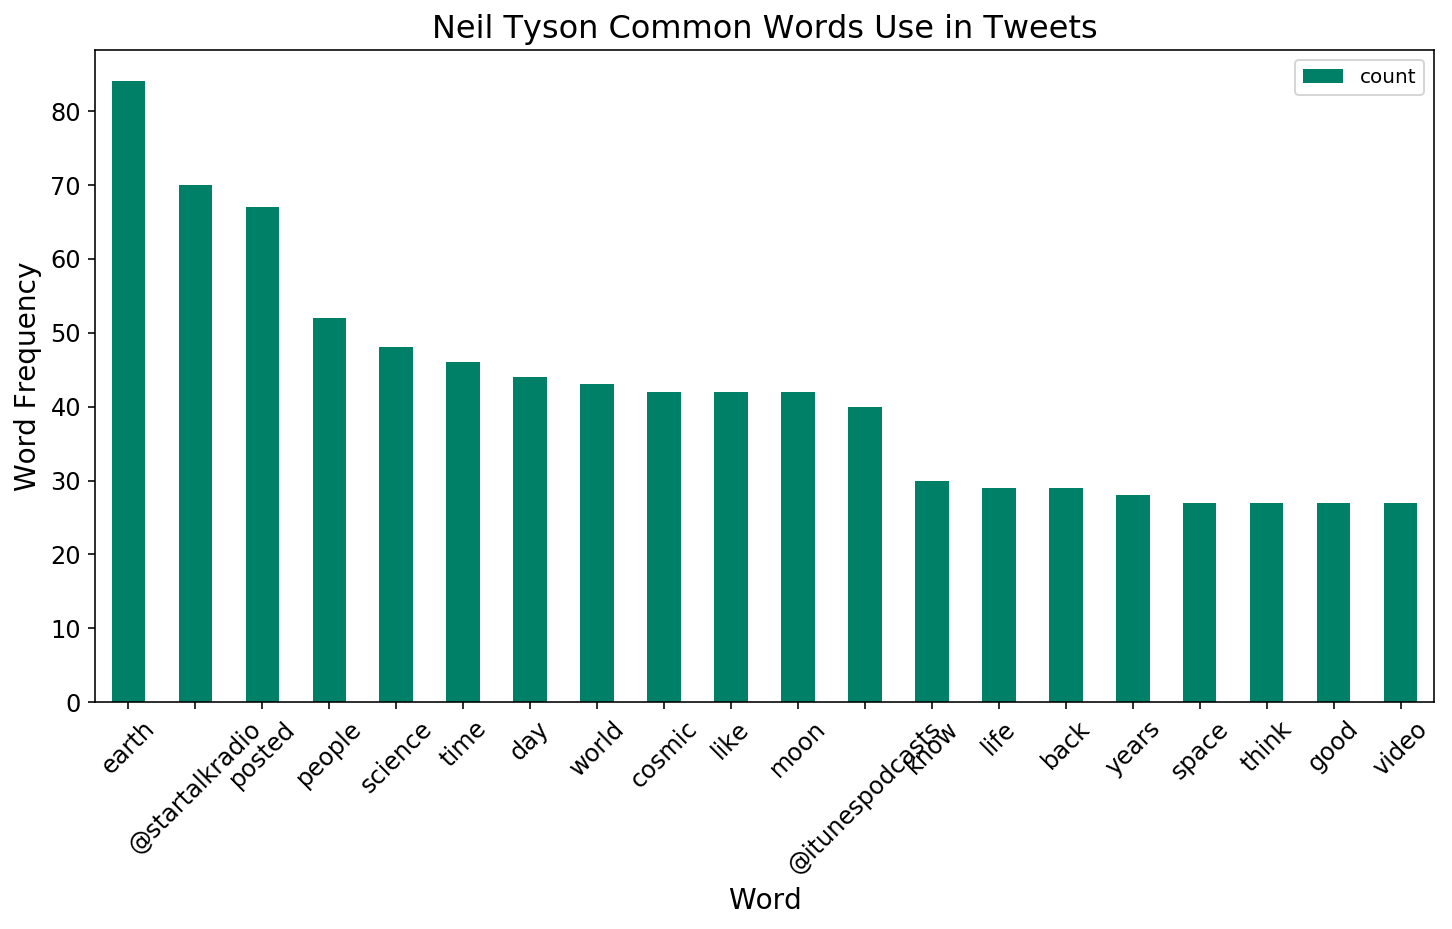

In [28]:
neil_common_words = pd.DataFrame(neil_counter.most_common(20), columns = ['word', 'count'])
neil_common_words.plot(x = 'word', y = 'count', kind = 'bar', figsize = (12, 6), fontsize=12,
                      colormap = 'summer', rot = 45)

plt.title('Neil Tyson Common Words Use in Tweets', fontsize = 16)
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 14)
plt.show()

** My perception is that Neil usually focus on other planets. But he actually cares about our home, the earth and people a lot. **


In [29]:
# Let's look at the word cloud

more_stop_words = {'word', 'count'}
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS.union(more_stop_words))

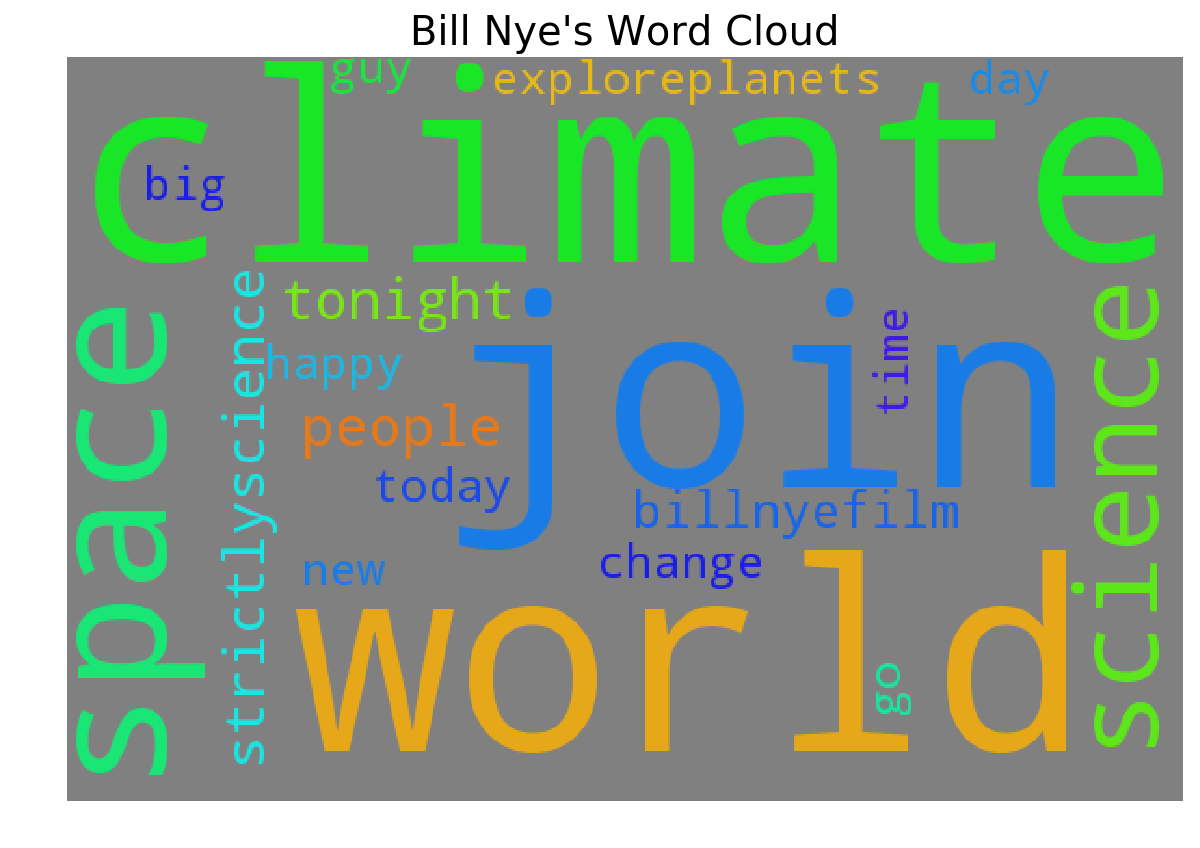

In [30]:
wordcloud = WordCloud(background_color='grey',
                     stopwords = stopwords,
                     width = 600,
                     height = 400,
                     ).generate(str(bill_common_words[:50]))


print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.title("Bill Nye's Word Cloud", fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

                     

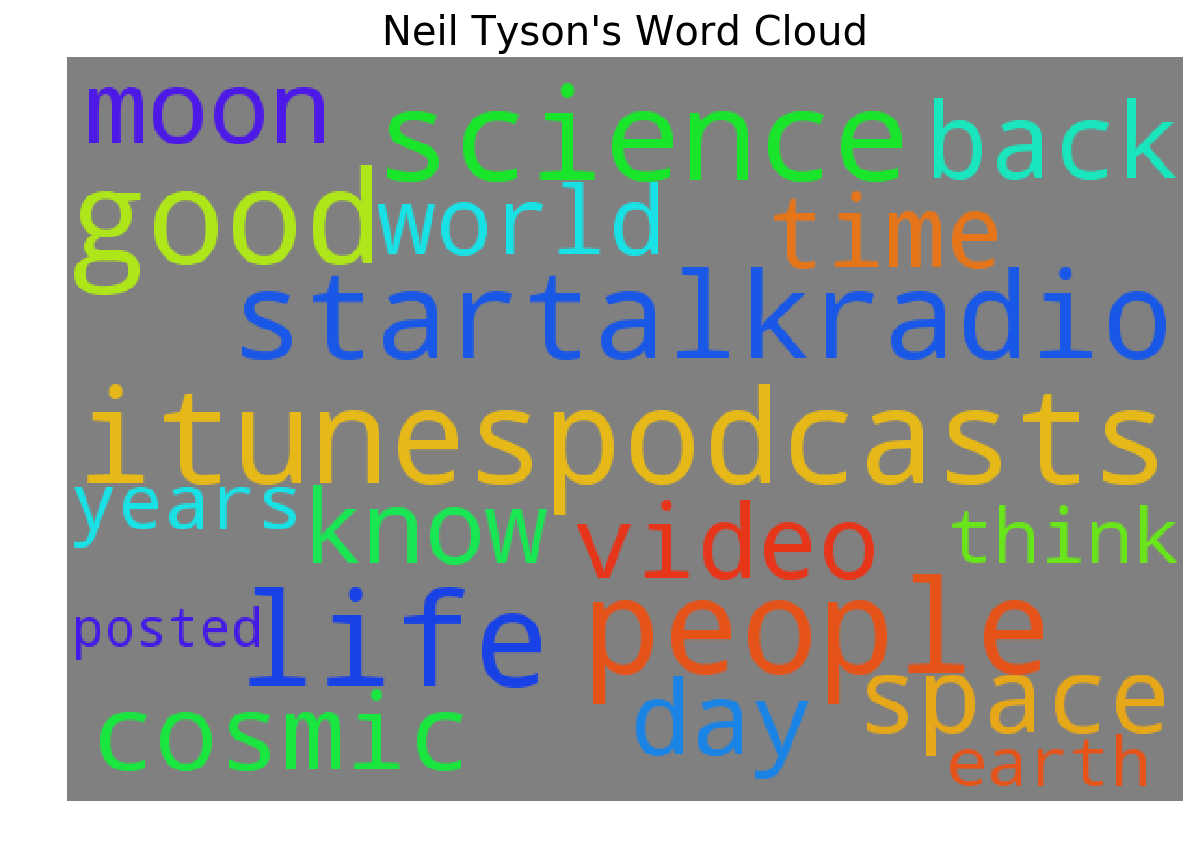

In [31]:
wordcloud = WordCloud(background_color='grey',
                      stopwords = stopwords, 
                     width = 600,
                     height = 400, 
                     ).generate(str(neil_common_words[:50]))


print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.title("Neil Tyson's Word Cloud", fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


---

## Bill or Neil?

Now, do you think we can predict which tweet belong to who?

In [37]:
# combine the two user twitter datasets together

data = pd.concat([bill_df, neil_df])
data.sample(5)

,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text
958,Thu Oct 30 01:26:11 +0000 2014,5105,Bill Nye,[],2017-11-01 22:05:42.113659,7041,World Series Science: don't dive into 1st base...
505,Thu Nov 03 02:02:20 +0000 2016,3821,Neil deGrasse Tyson,[],2017-11-01 22:05:43.118962,284,One more?
721,Fri Jun 19 19:00:54 +0000 2015,496,Bill Nye,[],2017-11-01 22:05:41.792098,52,We're letting more than 25 of you youngsters i...
656,Fri Apr 29 14:33:07 +0000 2016,10783,Neil deGrasse Tyson,[],2017-11-01 22:05:43.535041,4180,Subaru is what Japanese call the Pleiades clus...
440,Tue Dec 27 19:44:47 +0000 2016,37,Neil deGrasse Tyson,[],2017-11-01 22:05:43.118807,4,@almostMo That was early in the Twitterverse. ...


In [38]:
#label the two users.

data['user_label'] = data['handle'].map({'Bill Nye': 0, 'Neil deGrasse Tyson': 1})
data.sample(5)


,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text,user_label
113,Thu Aug 10 13:14:33 +0000 2017,262287,Neil deGrasse Tyson,[],2017-11-01 22:05:42.400611,111709,Odd. No one is in denial of America’s Aug 21 t...,1
150,Fri Jul 14 06:37:42 +0000 2017,6232,Neil deGrasse Tyson,[],2017-11-01 22:05:42.400685,618,@iamliramusic If you've never been properly ta...,1
930,Fri Nov 13 17:32:34 +0000 2015,1476,Neil deGrasse Tyson,[],2017-11-01 22:05:43.852549,389,"Hey @JohnAllenPaulos, Why not come up with a n...",1
534,Sun Oct 02 21:14:48 +0000 2016,28692,Neil deGrasse Tyson,[],2017-11-01 22:05:43.119020,14799,The urge to want some bit of information to be...,1
167,Mon Jun 26 00:47:35 +0000 2017,31582,Neil deGrasse Tyson,[],2017-11-01 22:05:42.400713,6201,Thought I saw a dino-Transformer eat a Car. S...,1


In [39]:
# Define independent & dependent variable.
# In this case, the independent variable is the twitter text. The dependent variable would be the user_label.

X = data['text']
y = data['user_label'].values

In [40]:
# Splitting the dataset into the Training set and Test set.
# Since the dataset has 2000 tweets, I user 90% for training and 10% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#### Since we are training a computer to learn words and computer only understands numbers, we must convert the tweets into numbers. This process is called vertorization or Bag of Words.
#### skit-learn has a few packges that can perform this task. The most commone ones are CountVectorizer,  HashingVectorizer, and TfidfVectorizer. 
#### In this case, I am using CountVectorizer to create Bag of Words. CountVectorizer turns a collection of words into numbers and counts the occurrence of each word appear in the twitter dataset.
#### When the tweets are vectorized, they are being transformed into a document-term matrix, short for dtm. Each word (term) will be treated as an independent variable.



In [41]:
# Create the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# Once the corpus is being vectorized and each individual word transfomred into a feature,
# there will be thousands of features. We may just want to use the the most common 1500 words (features)

vect = CountVectorizer(max_features = 1500)

# First fit the corpus
vect.fit(X_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
print (vect.get_feature_names()[:50:2])

[u'00', u'10', u'10th', u'12', u'14', u'16', u'18', u'1989', u'1st', u'2000', u'2015', u'2017', u'22', u'25', u'27', u'2m', u'30', u'30s', u'3min', u'400', u'50', u'8clu8h6rri', u'able', u'above', u'across']


In [43]:
# Then transform the training independent dataset into document term matrix. I called it X_train_dtm

X_train_dtm = vect.transform(X_train)
X_train_dtm

<1800x1500 sparse matrix of type '<type 'numpy.int64'>'
	with 21949 stored elements in Compressed Sparse Row format>

In [44]:
X_train_dtm = X_train_dtm.toarray()
X_train_dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
# Take a look at how the corpus being vectorized. 

pd.DataFrame(X_train_dtm, columns = vect.get_feature_names()).head()

,00,000,10,100,10th,11,12,13,14,15,...,you,young,your,yours,yourself,yrs,yup,yuuup,zeitgeistfilm,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### As you can see, the vectorization process turns each individual word into a feature. 
#### Most people typically use a very small subset of words frequently. This resulting matrix will have many feature values that are zeros (99% of them).
#### For example, the collection of these 2000 tweets may contain 10,000 unique words in total. Each tweet usually use less than 20 unique words. Twitter only allows you to less than 140 characters anyway. 
#### Choosing 1500 words (features) should be sufficient.


## Model Selection

### 1) Gaussian Naive Bayes

One of the most common algorithms for classifier prediction on Natural Language Processing is Gaussian Naive Bayes. This algorithm is based on Baynes Theorem, conditional probability. In this case, we are trying to find out the likelihood of a tweet from either Bill or Neil given the features(the words).

In [46]:
from sklearn.naive_bayes import GaussianNB
gaunb = GaussianNB()
gaunb.fit(X_train_dtm, y_train )

GaussianNB(priors=None)

In [47]:
# In order to make a prediction, the test tweets must have the same features as 
# the training tweets, both in number and meaning. 
# Therefore, we also need to transform the X_test tweets into document-term matrix.

X_test_dtm = vect.transform(X_test)
X_test_dtm = X_test_dtm.toarray()
X_test_dtm


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
pd.DataFrame(X_test_dtm, columns = vect.get_feature_names()).head()

,00,000,10,100,10th,11,12,13,14,15,...,you,young,your,yours,yourself,yrs,yup,yuuup,zeitgeistfilm,zero
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# make predictions

y_pred_gaunb = gaunb.predict(X_test_dtm)

In [50]:
# OK, now let's see how accurate the predictions are

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_gaunb)

0.80500000000000005

### 85% accuracy.  That's not bad. 
#### Let's look at the confusion matrix to find out the actual and predictions

In [51]:
confusion_gaunb = metrics.confusion_matrix(y_test, y_pred_gaunb)
confusion_matrix_gaunb = pd.DataFrame(confusion_gaunb, index = ['Actual: Bill', 'Actual: Neil'],
                               columns = ['Predicted: Bill', 'Predicted: Neil'])
confusion_matrix_gaunb

,Predicted: Bill,Predicted: Neil
Actual: Bill,87,4
Actual: Neil,35,74


#### Out of 200 tweets, 171 tweets are predicted accurately.
#### 23 Neil's tweets incorrectly identified as Bill's. 6 Bill's tweets incorrectly identified as Neil's. 

#### Let's see which tweets were incorrectly identified. 

In [52]:
# Refer to the user label, 0 is Bill and 1 is Neil.
# Check Bill's tweets incorrectly identified as Neil's
# If the label in y_test is 0 and y_pred is 1, this means the Bill's tweets are incorrectly identified as Neil's. 

incorrect_bill_prediction = pd.DataFrame(X_test[y_test < y_pred_gaunb])
incorrect_bill_prediction

,text
687,Flying By that Pluto! http://t.co/QItRUmqeRB
878,"If you're following @neiltyson, wheels not har..."
731,Orbit will decay pretty quickly now that sail ...
641,RT @RollingStone: The worst impacts of climate...


Both Bill and Neil tweet about climate change and cosmos a lot. These tweets here also sound like Neil's. 

In [53]:
# Check Neil's tweets incorrectly identified as Bill's
# Similary, iff the label in y_test is 1 and y_pred is 0, this means the Neil's tweets are incorrectly 
# identified as Bill's. 

incorrect_neil_prediction = pd.DataFrame(X_test[y_test > y_pred_gaunb])
incorrect_neil_prediction.sample(5)

,text
222,@wizardofAz @StarTalkRadio @Gladwell https://t...
722,"If you have a gene for celibacy, you didn’t in..."
7,I still think there should be a dinosaur named...
676,Feelin’ Earthy today…
519,@makoty5 Welcome to Twitter.


On line item 834, Bill tweets about film many times. billnyefilm is one of the most mentioned word in Bill's tweet. This may cause some confusion to the machine.  

In [54]:
# Let's check prediction probability

y_pred_prob_gaunb = gaunb.predict_proba(X_test_dtm)[:, 1]

In [55]:
metrics.roc_auc_score(y_test, y_pred_prob_gaunb)

0.90840810565581198

### 92.49%. That is quite good. 

### 2) Logistic Regression

Another very effective algorithm on binary classifiction prediction is Logistic Regression. This is based on odd ratio. In this case, what is the odd of a tweet coming from Bill or Neil. 

Let's try if Logistic Regression can improve prediction accuracy.

In [56]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_dtm, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# Make predictions using Logistic Regression model

y_pred_logit = logit.predict(X_test_dtm)

In [58]:
# Check Logistic Regression prediction accuracy rate

metrics.accuracy_score(y_test, y_pred_logit)

0.90500000000000003

**92% accuracy, not bad! **

In [59]:
confusion_logit = metrics.confusion_matrix(y_test, y_pred_logit)
confusion_matrix_logit = pd.DataFrame(confusion_logit, index = ['Actual: Bill', 'Actual: Neil'],
                               columns = ['Predicted: Bill', 'Predicted: Neil'])
confusion_matrix_logit

,Predicted: Bill,Predicted: Neil
Actual: Bill,84,7
Actual: Neil,12,97


**Logistcs Regression seems to grasp Neil's tweeting patern well.** 

**Out of 200 tweets, 184 tweets being identified correctly. **

** Only 5 tweets belong to Neil that is incorrectly identified as Bill. 11 Bill's tweets incorrectly identified as Neil's. Let's check these tweets that are incorrectly predicted.**

In [60]:
incorrect_logit_bill_prediction = pd.DataFrame(X_test[y_test < y_pred_logit])
incorrect_logit_bill_prediction

,text
735,Motor is running! Sail is Deploying!!! 39 Year...
878,"If you're following @neiltyson, wheels not har..."
434,Another gasoline powered vehicle? The socks ar...
100,"I see you, Science Twitter. You are the aerod..."
731,Orbit will decay pretty quickly now that sail ...
435,"Word ""Jeep"" derived from ""General Purpose."" Ti..."
389,"slash ""you all."""


In [61]:
incorrect_logit_neil_prediction = pd.DataFrame(X_test[y_test > y_pred_logit])
incorrect_logit_neil_prediction

,text
184,"Eratosthenes, of course. Third century BC. Ca..."
676,Feelin’ Earthy today…
533,"Thanks, Twitterverse, for all the birthday wis..."
435,"Athlete, Educator, Civil Rights Activist, Publ..."
552,My sense is that we don’t think enough about h...
288,The only time I ever mentioned Bill O’Reilly: ...
825,Seedless grapes. Seedless oranges. Seedless wa...
110,"@ionized4091 If you rummage here, you should f..."
837,RT @nathaniel: @neiltyson but crude gas is som...
981,CALLING ALL GEEKS: Must root for @Cubs — to f...


In [62]:
# Let's check prediction probability

y_pred_prob_logit = logit.predict_proba(X_test_dtm)[:, 1]

metrics.roc_auc_score(y_test, y_pred_prob_logit)

0.97227543099102731

### We have just improved the prediction probability from 92% to 97%. Logistics Regression is a good model to use. 